In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# **DATA PREPROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading datasets
data1 = pd.read_csv('/content/drive/MyDrive/Projekt2/attrition.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Projekt2/df1.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Projekt2/df2.csv')

In [ ]:
data1.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [ ]:
data2.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
data3.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
# We decide to drop data, that has the same values for all records.
data2 = data2.drop(['DailyRate', 'HourlyRate', 'Department', 'EmployeeCount',
                    'JobRole', 'EducationField'], axis = 1)
data3 = data3.drop(['StandardHours', 'YearlyIncome', 'Over18'], axis = 1)

In [ ]:
# We connect both data frames with data about users
df = pd.concat([data2, data3], axis=1)

In [ ]:
df.Attrition.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# Time to pack the rows with nan to a separate data frame
# - this will be the validation data frame

x_validate = df.loc[df.Attrition.isna()]
x_validate.shape

emp_nr = x_validate['EmployeeNumber']
emp_nr = emp_nr.T.drop_duplicates().T

In [ ]:
df.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'EmployeeNumber',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome'],
      dtype='object')

In [ ]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,EmployeeNumber,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726,7956.865588,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077,17226.922333,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000,1735.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000,5902.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000,7014.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,100146.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
# Before checking for duplicates, we do it again on fresh data frames
# for data2 and data3, to in case not overwrite original datasets.
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

In [ ]:
# Check for duplicates. What we don't consider for checking in duplicate is
# the EmployeeNumber (unique) and Attrition.
df2 = df2.drop_duplicates(subset = df2.columns.difference(['EmployeeNumber']),
                          keep='first')
df3 = df3.drop_duplicates(subset = df3.columns.difference(['EmployeeNumber',
                                                           'Attrition']),
                          keep='first')

In [ ]:
# We create a new df to work on and we set EmployeeNumber as an index.
df_clean = df2.join(df3.set_index('EmployeeNumber'), on='EmployeeNumber')
df_clean
# As a result, we have 1736 rows with unique records.

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,7928,9159.0,Travel_Frequently,365.0,Research & Development,4.0,5.0,Medical,1.0,3.0,Male,89.0,2.0,4.0,Manager,4.0,Married,15202.0,5602.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,7937,32.0,Travel_Frequently,689.0,Sales,664579.0,2.0,Medical,1.0,4.0,Male,35.0,1.0,2.0,Sales Executive,4.0,Divorced,4668.0,22812.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4413,7944,3437.0,Travel_Rarely,1299.0,Research & Development,27.0,3.0,Medical,1.0,3.0,Male,94.0,3.0,2.0,Healthcare Representative,3.0,Married,5237.0,16577.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4443,7974,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now we get rid off the Nan's
df_clean = df_clean.dropna()

In [ ]:
df_clean
# At this step our data frame has 1323 rows, no duplicates, no Nan's

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1918,26.0,Travel_Frequently,1096.0,Research & Development,6.0,3.0,Other,1.0,3.0,Male,61.0,4.0,1.0,Laboratory Technician,4.0,Married,2544.0,7102.0,0.0,Y,No,18.0,3.0,1.0,80.0,1.0,8.0,3.0,3.0,7.0,7.0,7.0,7.0,No,30528.0
1319,1019,22.0,Travel_Rarely,217.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,Male,94.0,1.0,1.0,Laboratory Technician,1.0,Married,2451.0,6881.0,1.0,Y,No,15.0,3.0,1.0,80.0,1.0,4.0,3.0,2.0,4.0,3.0,1.0,1.0,No,29412.0
1320,677,33.0,Travel_Rarely,1216.0,Sales,8.0,4.0,Marketing,1.0,3.0,Male,39.0,3.0,2.0,Sales Executive,3.0,Divorced,7104.0,20431.0,0.0,Y,No,12.0,3.0,4.0,80.0,0.0,6.0,3.0,3.0,5.0,0.0,1.0,2.0,No,85248.0
1321,1171,42.0,Travel_Rarely,647.0,Sales,4.0,4.0,Marketing,1.0,2.0,Male,45.0,3.0,2.0,Sales Executive,1.0,Single,5155.0,2253.0,7.0,Y,No,13.0,3.0,4.0,80.0,0.0,9.0,3.0,4.0,6.0,4.0,1.0,5.0,No,61860.0


In [ ]:
df_clean.Attrition.unique()

array([0, 1])

In [ ]:
# Here we apply in Attrtrion column 0 for 'No' and 1 for 'Yes'
df_clean['Attrition'] = df_clean['Attrition'].map({'No':0, 'Yes':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Here is a code if we want to have a fast overview for unique values
# for each column. Can be helpful to discover where we have text categories
# instead of values and this should be then fixed for better model performance.
df_labels = list(df_clean.columns)
for n in df_labels:
  print(f"***Column {n}. \nUnique values: {df_clean[n].unique()}")

***Column EmployeeNumber. 
Unique values: [ 104 1638  164 ...  677 1171  522]
***Column Age. 
Unique values: [30. 38. 26. 28. 35. 34. 32. 42. 40. 48. 39. 18. 43. 21. 53. 45. 29. 33.
 41. 24. 37. 50. 36. 52. 47. 31. 49. 54. 44. 22. 46. 27. 55. 59. 25. 23.
 56. 20. 60. 51. 58. 19. 57.]
***Column BusinessTravel. 
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
***Column DailyRate. 
Unique values: [ 852.  397.  841. 1117.  464. 1107. 1018.  269.  296.  989.  855. 1181.
  895.  827.  977.  544.  244.  995. 1343. 1282.  153.  280.  404. 1265.
  252. 1496.  306.  128.  529.  553.  572.  482.  471.  509.  130.  506.
  329.  367. 1219.  746. 1322.  969. 1271. 1158.  688.  319.  371. 1336.
  107.  448.  359.  625. 1017.  835. 1050.  523. 1064. 1128.  928. 1319.
  932.  809. 1376.  253.  336.  884. 1385.  945.  118. 1231.  426.  737.
 1442.  853.  557.  377.  616. 1398. 1138.  531.  138. 1377. 1240. 1400.
 1001. 1082. 1171.  136.  218.  452. 1397. 1192.  944.  408. 1040. 1329.
 

In [ ]:
# Have a quick overview on data frame again
df_clean.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,1024.681784,36.846561,802.082389,9.129252,2.903250,1.0,2.723356,66.074830,2.735450,2.058957,2.722600,6457.236584,14285.287226,2.680272,15.135299,3.147392,2.711262,80.0,0.801209,11.242630,2.780045,2.766440,7.027967,4.208617,2.198035,4.122449,0.160998,77486.839002
std,601.020676,9.173312,403.441918,8.072989,1.028201,0.0,1.090028,20.403449,0.707325,1.106097,1.099854,4678.810994,7132.402468,2.510757,3.600805,0.354631,1.077799,0.0,0.856018,7.817758,1.275569,0.699486,6.202091,3.648972,3.249359,3.596746,0.367668,56145.731925
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,495.500000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2901.500000,7974.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,34818.000000
50%,1017.000000,36.000000,804.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4898.000000,14115.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,58776.000000
75%,1553.500000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8206.500000,20461.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,98478.000000
max,2068.000000,60.000000,1498.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,239988.000000


In [ ]:
# Remove columns with std = 0, because it means all values are the same,
# so they don't influence the result. Also one string type has also one value.
df_clean = df_clean.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

In [ ]:
# Do the same with the validation set!
x_validate = x_validate.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

In [ ]:
# Create one hot encoding for some columns (these with categorical data) 
# with get_dummies pandas function
df_clean = pd.get_dummies(df_clean,
                    columns=['BusinessTravel', 'Department', 'EducationField',
                             'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
                    prefix=['BusinessTravel', 'Department', 'EducationField',
                             'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [ ]:
# And repeat it with x_validate data frame
x_validate = pd.get_dummies(x_validate,
                    columns=['BusinessTravel', 'Department', 'EducationField',
                             'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
                    prefix=['BusinessTravel', 'Department', 'EducationField',
                             'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [ ]:
# At this step create already an x_val set from x_validate data frame
x_val = x_validate.drop(labels=['Attrition', 'EmployeeNumber'], axis=1)
# Note, that for this dataset we use x_val, not X_val used further in the code

In [ ]:
# Have a look at teh data frame, if any text information as categories is left and etc.
df_clean.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,852.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,164,26.0,841.0,6.0,3.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,395,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,53,35.0,464.0,4.0,2.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


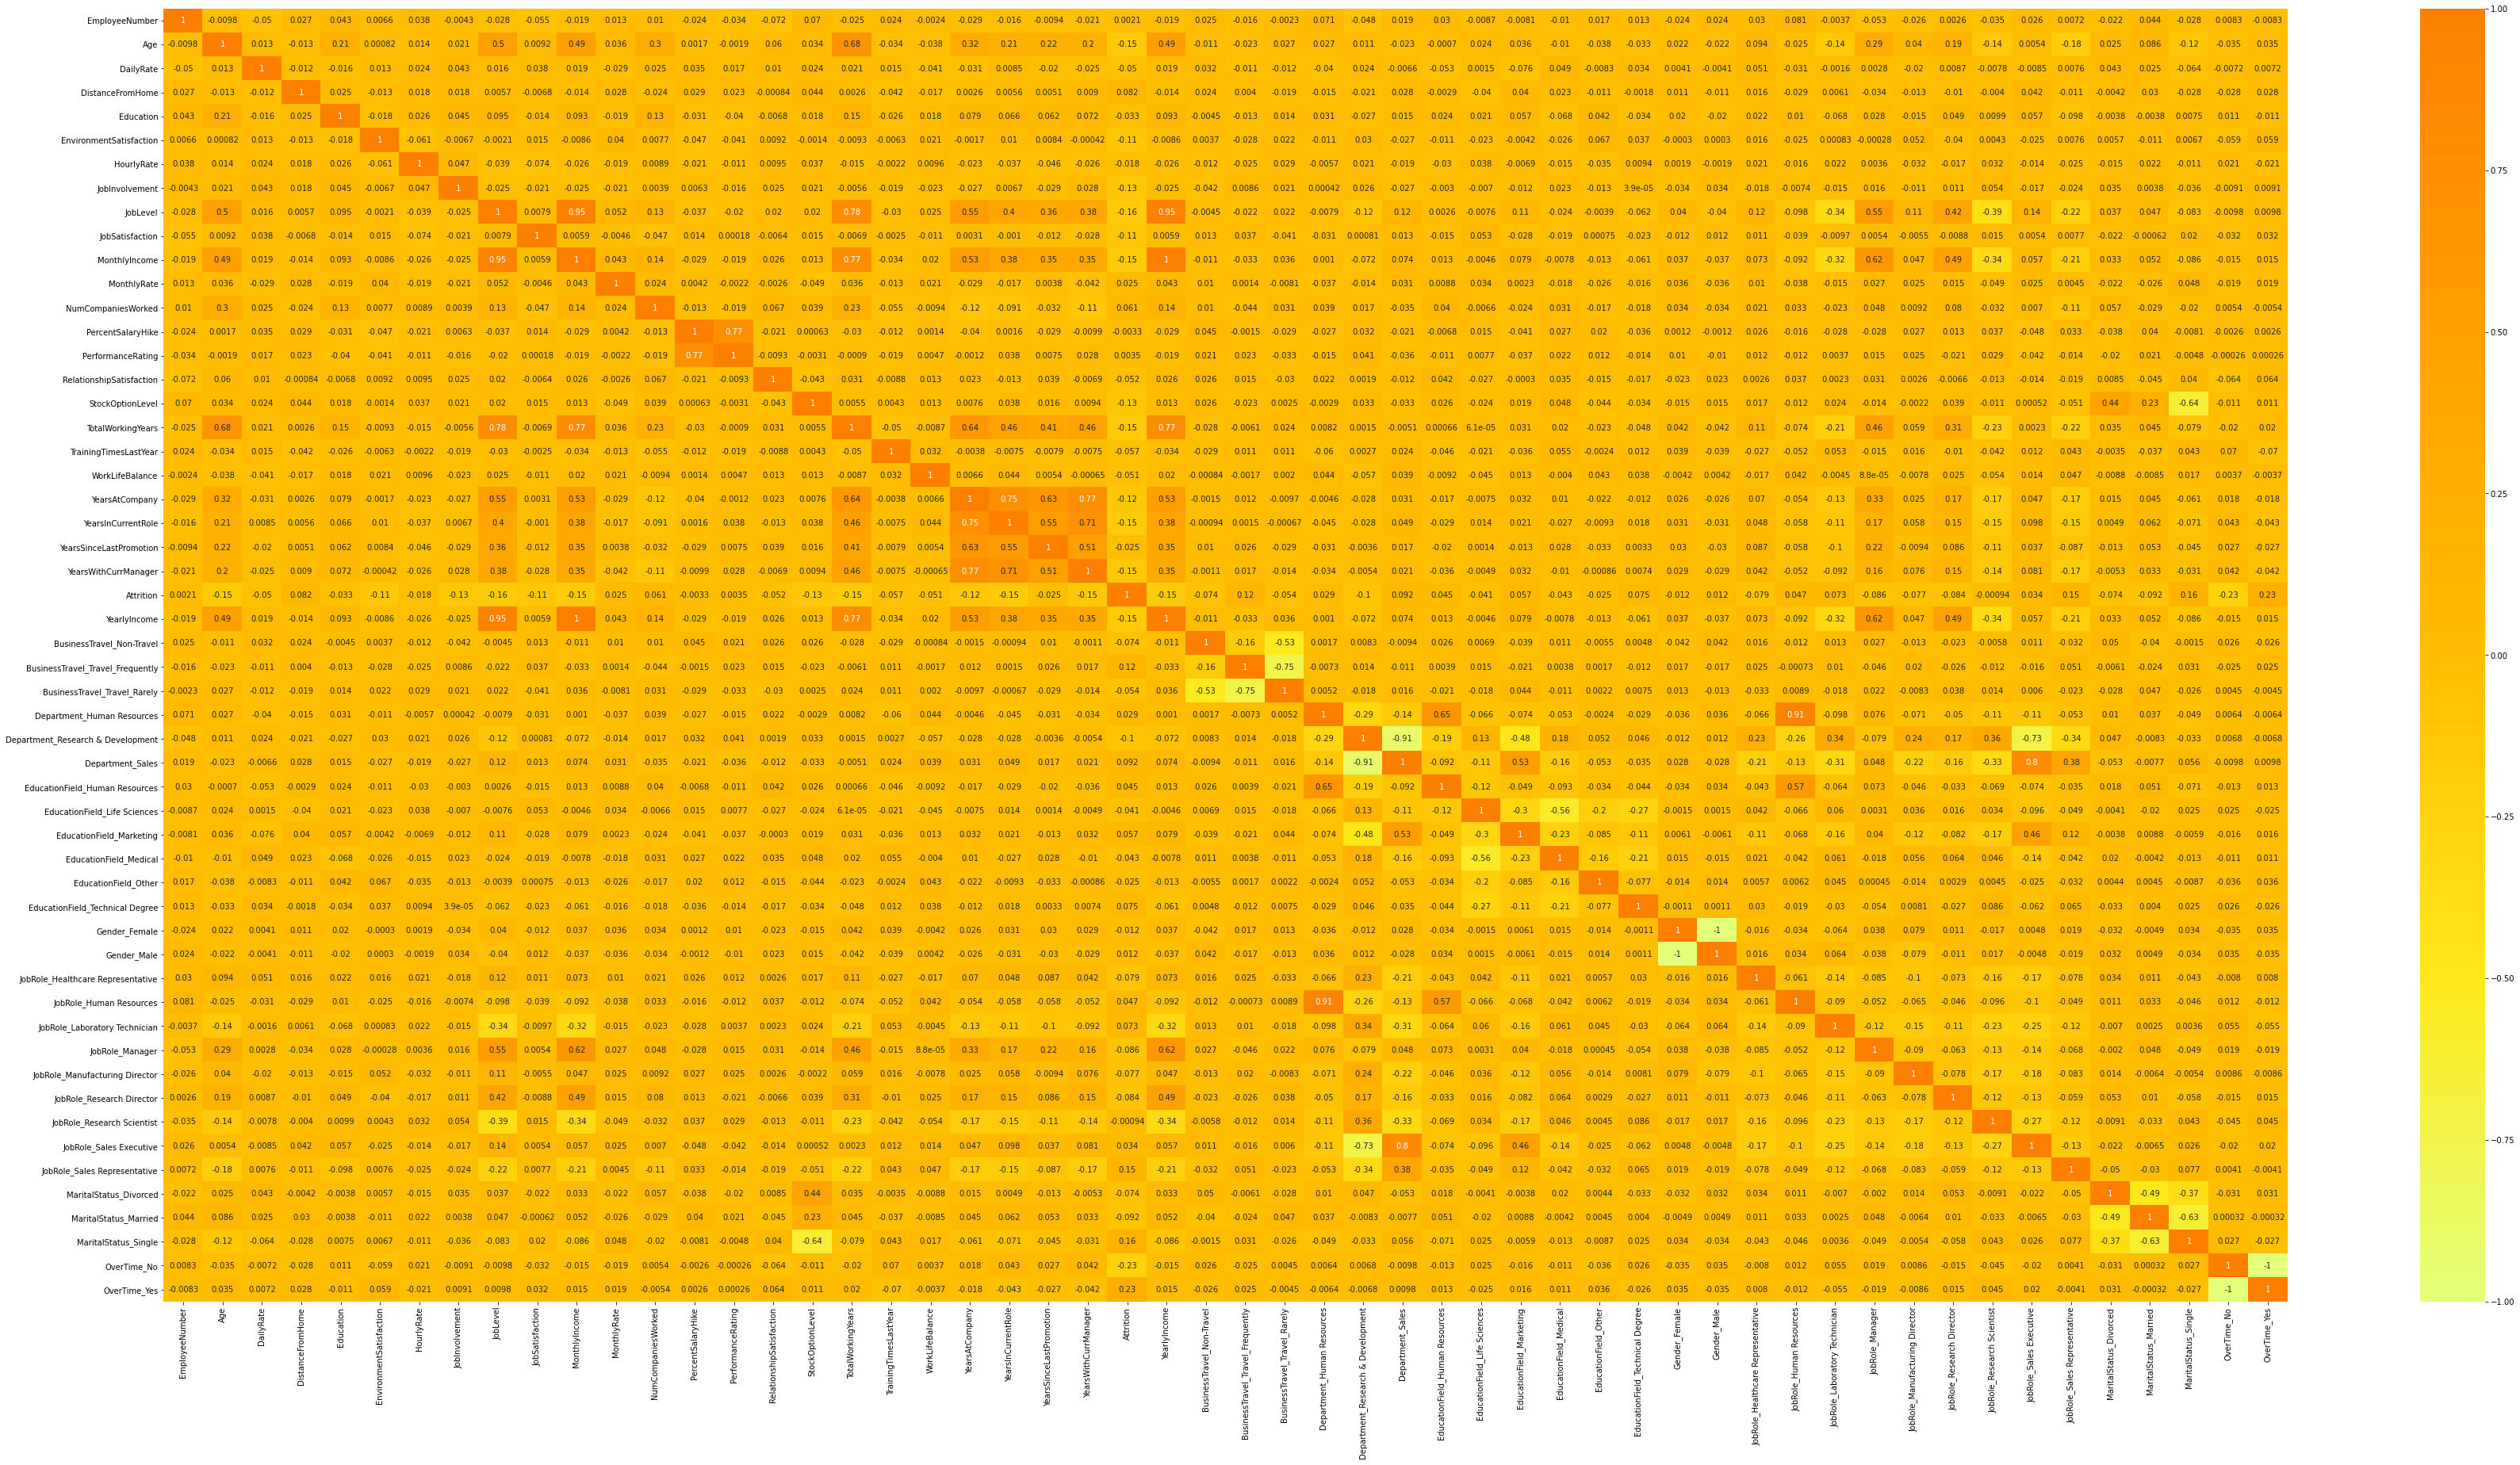

In [ ]:
# Fast overview on the correlation matrix between different elements in df
f = plt.figure(figsize=(60,30))
corr = df_clean.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
df_clean.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,1024.681784,36.846561,802.082389,9.129252,2.903250,2.723356,66.074830,2.735450,2.058957,2.722600,6457.236584,14285.287226,2.680272,15.135299,3.147392,2.711262,0.801209,11.242630,2.780045,2.766440,7.027967,4.208617,2.198035,4.122449,0.160998,77486.839002,0.102797,0.188964,0.708239,0.043084,0.650038,0.306878,0.018896,0.416478,0.109599,0.308390,0.055178,0.091459,0.398337,0.601663,0.089191,0.036281,0.176115,0.068027,0.099773,0.052154,0.198035,0.221466,0.058957,0.225246,0.456538,0.318216,0.723356,0.276644
std,601.020676,9.173312,403.441918,8.072989,1.028201,1.090028,20.403449,0.707325,1.106097,1.099854,4678.810994,7132.402468,2.510757,3.600805,0.354631,1.077799,0.856018,7.817758,1.275569,0.699486,6.202091,3.648972,3.249359,3.596746,0.367668,56145.731925,0.303808,0.391628,0.454745,0.203123,0.477138,0.461373,0.136211,0.493161,0.312508,0.462003,0.228413,0.288369,0.489741,0.489741,0.285127,0.187060,0.381062,0.251888,0.299811,0.222422,0.398669,0.415391,0.235633,0.417902,0.498296,0.465960,0.447508,0.447508
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,495.500000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2901.500000,7974.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,34818.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1017.000000,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4898.000000,14115.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.

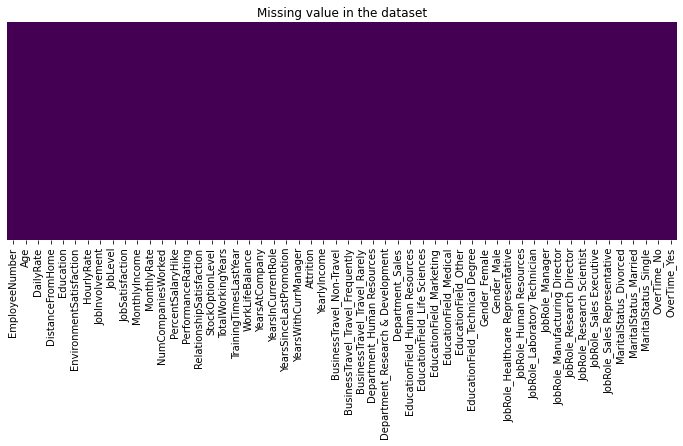

In [ ]:
# Fast check if the problem with Nan's is for sure solved (in a graphical way)
plt.figure(figsize=(12,4))
sns.heatmap(df_clean.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
# Let's check proportions of Attrtion values in our training dataset
df_clean.Attrition.value_counts()
# We can see a big disproportion between 0's and 1's.

0    1110
1     213
Name: Attrition, dtype: int64

In [ ]:
# Time to start with training some models
from sklearn.model_selection import train_test_split

In [ ]:
X = df_clean.drop(labels=['Attrition', 'EmployeeNumber'], axis=1)
y = df_clean['Attrition']
X.shape, y.shape

((1323, 52), (1323,))

In [ ]:
# Split the dataset into train, test and validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [ ]:
# Check the size of each dataframe we created
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((793, 52), (265, 52), (265, 52), (793,), (265,), (265,))

# **MODELLING - pretesting with few models**

On towardsdatascience.com we found a fancy way to test few models with default parameters on our data and evaluate them. Let's implement it!

Source: https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [ ]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    dfs = []
    models = [
              ('LogReg', LogisticRegression()),
              ('DecTree', DecisionTreeClassifier()),
              ('RanFor', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('MultiNB', MultinomialNB()),
              ('AdaBoost', AdaBoostClassifier()),
              ('XGB', XGBClassifier())
              ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted',
               'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
      cv_results = model_selection.cross_validate(model, X_train, y_train,
                                                  cv=kfold, scoring=scoring)
      clf = model.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      print(name)
      print(classification_report(y_test, y_pred,
                                  target_names=target_names))
      results.append(cv_results)
      names.append(name)
      this_df = pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
      final = pd.concat(dfs, ignore_index=True)
    return final

In [ ]:
final = run_exps(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogReg
              precision    recall  f1-score   support

   malignant       0.84      0.99      0.91       222
      benign       0.33      0.02      0.04        43

    accuracy                           0.83       265
   macro avg       0.59      0.51      0.48       265
weighted avg       0.76      0.83      0.77       265

DecTree
              precision    recall  f1-score   support

   malignant       0.87      0.88      0.88       222
      benign       0.33      0.30      0.32        43

    accuracy                           0.79       265
   macro avg       0.60      0.59      0.60       265
weighted avg       0.78      0.79      0.78       265

RanFor
              precision    recall  f1-score   support

   malignant       0.85      1.00      0.92       222
      benign       0.75      0.07      0.13        43

    accuracy                           0.85       265
   macro avg       0.80      0.53      0.52       265
weighted avg       0.83      0.85      0.79       26

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

SVM
              precision    recall  f1-score   support

   malignant       0.84      1.00      0.91       222
      benign       0.00      0.00      0.00        43

    accuracy                           0.84       265
   macro avg       0.42      0.50      0.46       265
weighted avg       0.70      0.84      0.76       265

GNB
              precision    recall  f1-score   support

   malignant       0.87      0.93      0.90       222
      benign       0.45      0.30      0.36        43

    accuracy                           0.83       265
   macro avg       0.66      0.62      0.63       265
weighted avg       0.80      0.83      0.81       265

MultiNB
              precision    recall  f1-score   support

   malignant       0.87      0.47      0.61       222
      benign       0.19      0.65      0.30        43

    accuracy                           0.50       265
   macro avg       0.53      0.56      0.45       265
weighted avg       0.76      0.50      0.56       265

Ada

In [ ]:
# Thanks to the code above, we could test few models we've chosen
# and see their performance values in a table 
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.067785,0.012346,0.817610,0.733391,0.817610,0.762506,0.683054,LogReg
1,0.048419,0.007580,0.811321,0.847374,0.811321,0.738045,0.653789,LogReg
2,0.026842,0.012907,0.842767,0.710257,0.842767,0.770859,0.597612,LogReg
3,0.030764,0.008032,0.860759,0.740907,0.860759,0.796349,0.608623,LogReg
4,0.044510,0.007473,0.860759,0.814508,0.860759,0.807511,0.631016,LogReg
5,0.011805,0.007385,0.754717,0.765767,0.754717,0.760008,0.574899,DecTree
6,0.012989,0.007846,0.773585,0.763050,0.773585,0.767793,0.624508,DecTree
7,0.013231,0.007674,0.748428,0.778631,0.748428,0.761907,0.590448,DecTree
8,0.013167,0.007835,0.772152,0.788557,0.772152,0.779945,0.562834,DecTree
9,0.014067,0.007817,0.791139,0.810026,0.791139,0.799840,0.611965,DecTree


In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], 
                       var_name='metrics', value_name='values')

time_metrics = ['fit_time','score_time'] # fit time metrics## 

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

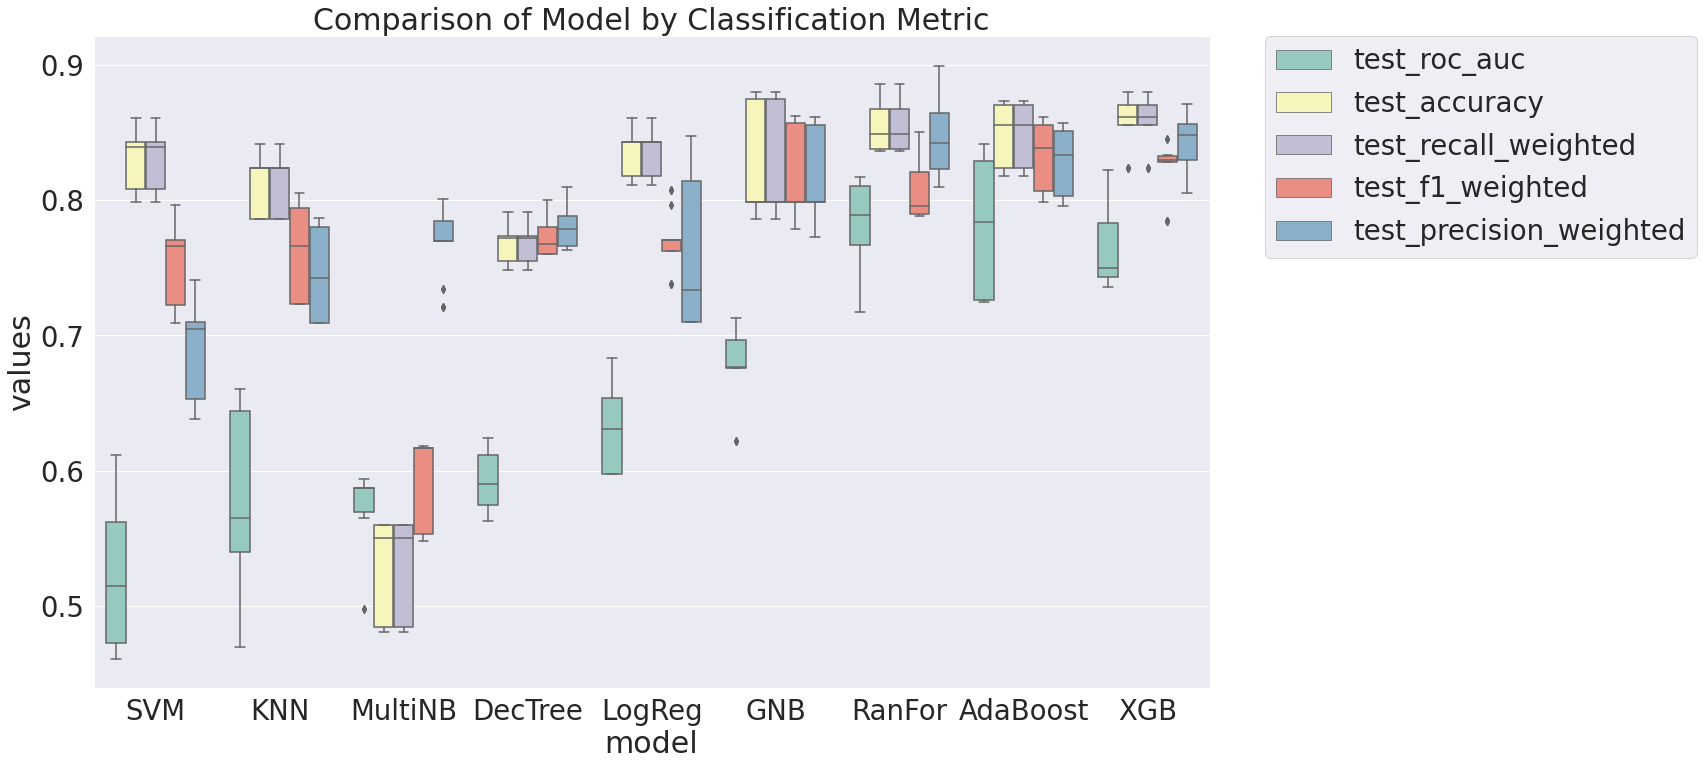

In [ ]:
# Now, all this pre-evaluation information is presented in a nice, graphical way.
# This helped us to choose, on which models we should focus for our dataset.
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit,
                palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
# If you want to save the plot, uncomment the line below.
# plt.savefig('/content/drive/MyDrive/Projekt2/benchmark_models_performance.png',dpi=300)

**Before we go forward and test our models, we want to create upsampled datasets and downsampled datasets.**

# **UPSAMPLING**

In [ ]:
# Up-scale the minority data
from sklearn.utils import resample

df_majority = df_clean[df_clean.Attrition==0]
df_minority = df_clean[df_clean.Attrition==1]
# print(df_minority.count(), df_majority.count())

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=1110,
                                 random_state=42)

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
X = df_upsampled.drop(labels=['Attrition', 'EmployeeNumber'], axis=1)
y = df_upsampled['Attrition']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25,
                                                  random_state=42,
                                                  stratify=y_train)

**Now, we check again with the few models test (chapter before), how the performance looks after upsampling**

In [ ]:
final_upsample = run_exps(X_train = X_train, y_train = y_train, X_test = X_test,
                          y_test = y_test)

In [ ]:
bootstraps = []
for model in list(set(final_upsample.model.values)):
    model_df = final_upsample.loc[final_upsample.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], 
                       var_name='metrics', value_name='values')

time_metrics = ['fit_time','score_time'] # fit time metrics## 

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

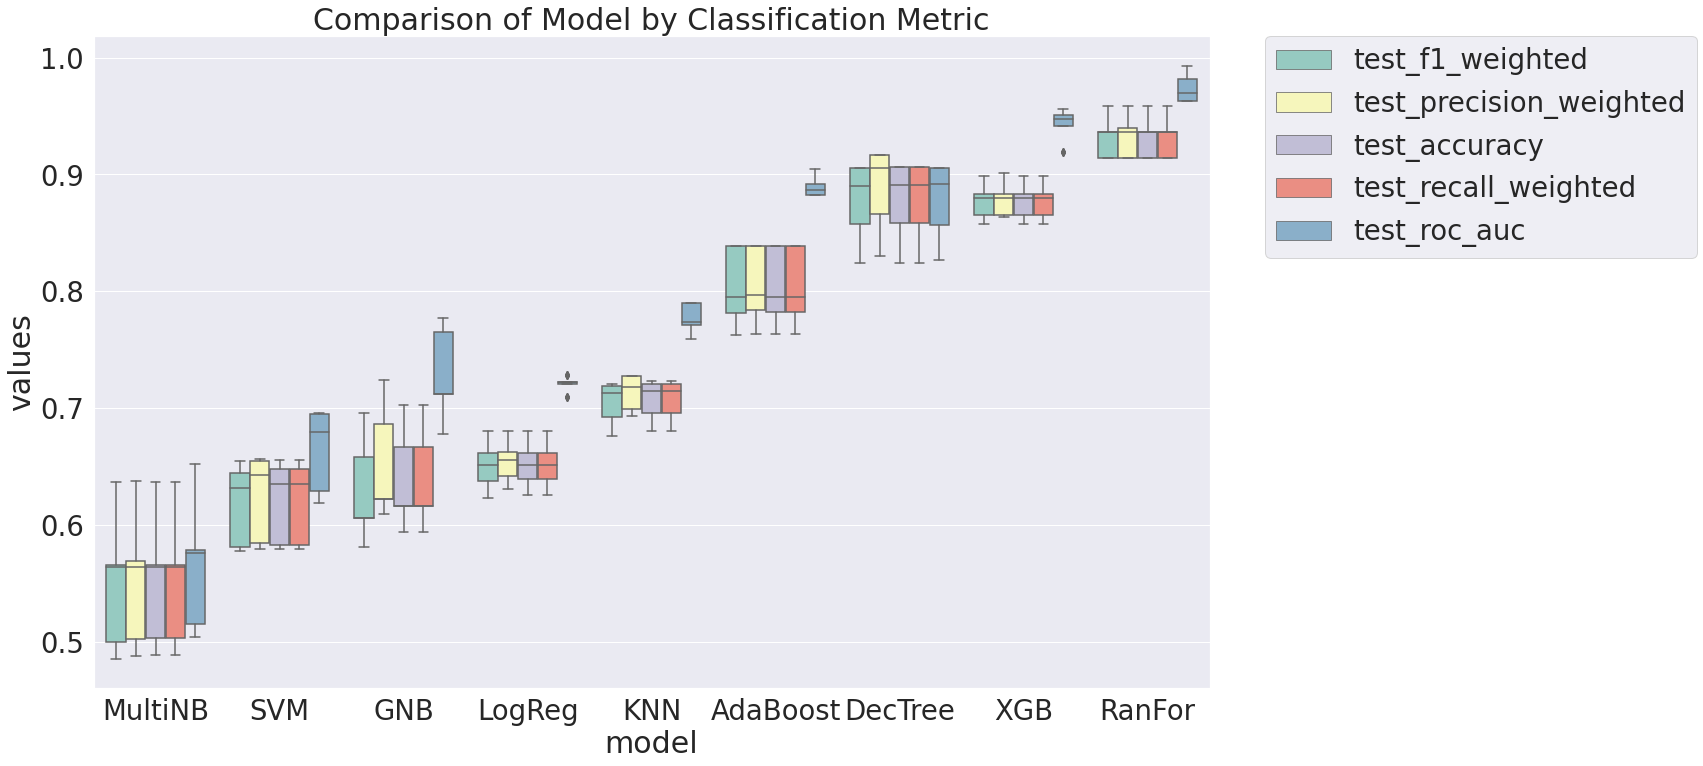

In [ ]:
# Here we visualize the results with upsampled dataset
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, 
                palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
# If you want to save the plot, uncomment the line below.
# plt.savefig('/content/drive/MyDrive/Projekt2/benchmark_models_performance_upsampling.png',dpi=300)

# **DOWNSAMPLING**

In [ ]:
# Down-scale the minority data
from sklearn.utils import resample

df_majority = df_clean[df_clean.Attrition==0]
df_minority = df_clean[df_clean.Attrition==1]
# print(df_minority.count(), df_majority.count())

In [ ]:
df_majority_downsampled = resample(df_majority, 
                                 replace=True,
                                 n_samples=213,
                                 random_state=42)

In [ ]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
X = df_downsampled.drop(labels=['Attrition', 'EmployeeNumber'], axis=1)
y = df_downsampled['Attrition']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25,
                                                  random_state=42,
                                                  stratify=y_train)

**Now, check again with the few models test, how the performance looks after downsampling**

In [ ]:
final_downsample = run_exps(X_train = X_train, y_train = y_train,
                            X_test = X_test, y_test = y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogReg
              precision    recall  f1-score   support

   malignant       0.62      0.67      0.64        43
      benign       0.64      0.58      0.61        43

    accuracy                           0.63        86
   macro avg       0.63      0.63      0.63        86
weighted avg       0.63      0.63      0.63        86

DecTree
              precision    recall  f1-score   support

   malignant       0.72      0.67      0.70        43
      benign       0.70      0.74      0.72        43

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86

RanFor
              precision    recall  f1-score   support

   malignant       0.80      0.86      0.83        43
      benign       0.85      0.79      0.82        43

    accuracy                           0.83        86
   macro avg       0.83      0.83      0.83        86
weighted avg       0.83      0.83      0.83        8

In [ ]:
bootstraps = []
for model in list(set(final_downsample.model.values)):
    model_df = final_downsample.loc[final_downsample.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], 
                       var_name='metrics', value_name='values')

time_metrics = ['fit_time','score_time'] # fit time metrics## 

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

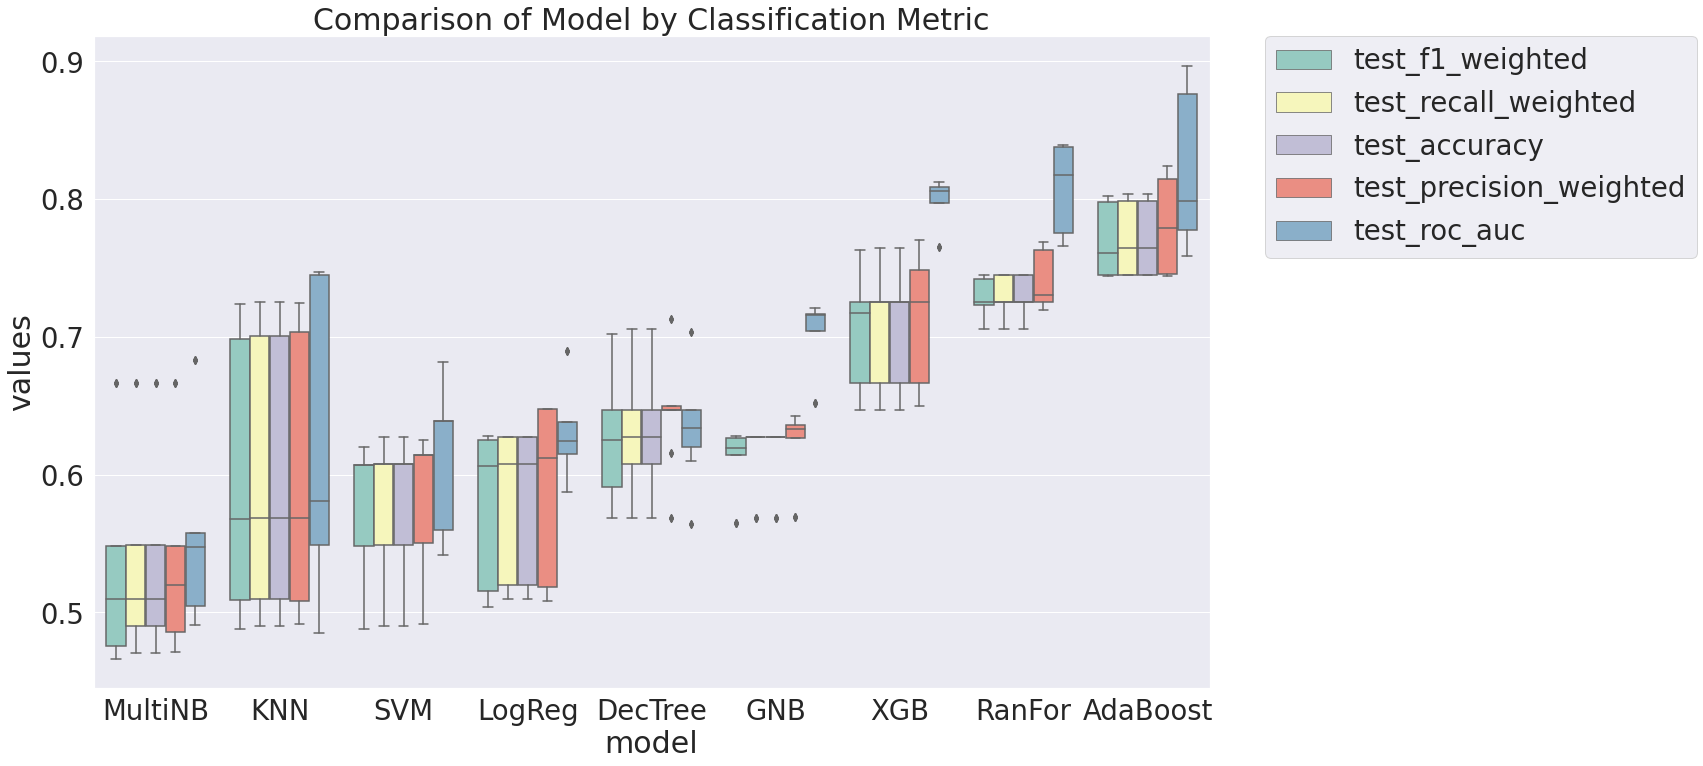

In [ ]:
# Here we visualize the results with downsampled dataset

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
# If you want to save the plot, uncomment the line below.
# plt.savefig('/content/drive/MyDrive/Projekt2/benchmark_models_performance_downsampling.png',dpi=300)

In [ ]:
#Next step is to work on upsampled data and look for the best parameters for Random Forest & AdaBoost.

After checking few models with raw dataset, upsampled and downsampled, we decide to work on upsampled dataframe.
Next step is to look for the best parameters for Random Forest & AdaBoost (Because with XGB we didn't feel yet too familiar).

# **Time for GridSearch!**

All our tests and fitting we will do on upsampled data, so remember to rerun the cells with upsampling before.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

## **AdaBoost**

In [ ]:
models = (AdaBoostClassifier(random_state=42))
parameters = {'n_estimators':[70, 90, 100, 150, 175, 200, 250, 300],
              'learning_rate':[0.5, 1, 1.25, 1.5, 1.75, 2]
              }
clf = GridSearchCV(models, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 1, 1.25, 1.5, 1.75, 2],
                         'n_estimators': [70, 90, 100, 150, 175, 200, 250,
                                          300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_estimator_, clf.best_params_

(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                    n_estimators=300, random_state=42),
 {'learning_rate': 1.75, 'n_estimators': 300})

In [ ]:
# We test our model with first best parameters.
# Then we test different ones above and go for next runs.
model_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                               learning_rate=1, n_estimators=90,
                               random_state=42)
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

In [ ]:
#Second run?
model_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                               learning_rate=1.5, n_estimators=150,
                               random_state=42)
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

In [ ]:
#Third run!
model_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                               learning_rate=1.75, n_estimators=300,
                               random_state=42)
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

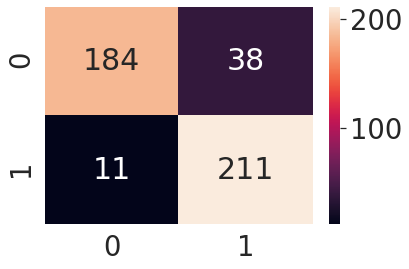

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       222
           1       0.85      0.95      0.90       222

    accuracy                           0.89       444
   macro avg       0.90      0.89      0.89       444
weighted avg       0.90      0.89      0.89       444



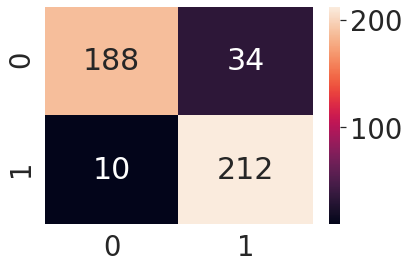

In [ ]:
y_pred_val = model_ada.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
#Predict for the competition 
#We used the third run model for AdaBoost
preds = model_ada.predict(x_val)
preds = pd.DataFrame(preds, columns=['Attrition'], dtype=np.int64)
emp_nr = emp_nr.reset_index(drop=True)
preds = emp_nr.join(preds)
preds.to_csv('preds_adaboost.csv', index=False)

## **Random Forest**

In [ ]:
models = (RandomForestClassifier(random_state=42))
parameters = {'n_estimators':[90, 100, 105, 110],
              'criterion':['gini', 'entropy'],
              'max_depth':[13, 14, 15, 16, 17],
              'class_weight':['balanced', 'balanced_subsample']
              }
clf = GridSearchCV(models, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [ ]:
clf.best_estimator_, clf.best_params_

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=15, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 {'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 15,
  'n_estimators': 100})

In [ ]:
#First run
model_rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=15, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=90,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

In [ ]:
# Second run
model_rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=15, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

In [ ]:
#Third run
model_rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=15, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

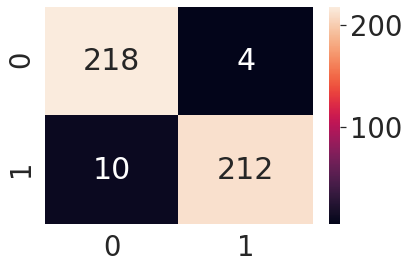

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       222
           1       0.98      0.95      0.97       222

    accuracy                           0.97       444
   macro avg       0.97      0.97      0.97       444
weighted avg       0.97      0.97      0.97       444



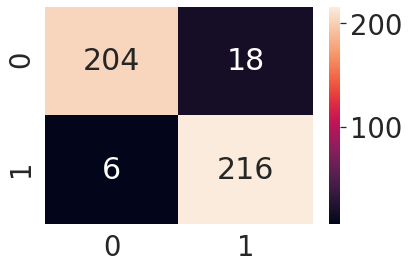

In [ ]:
y_pred_val = model_rfc.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
#Predict for the competition
preds = model_rfc.predict(x_val)
preds = pd.DataFrame(preds, columns=['Attrition'], dtype=np.int64)
emp_nr = emp_nr.reset_index(drop=True)
preds = emp_nr.join(preds)
preds.to_csv('preds_rfc.csv', index=False)

# **What's next?**

We've got with the last rfc model f1 score for 1 at 0.6 for the x_val (for X_val 0.97, so also pretty sweet). 

Let's work a bit around this Random Forest!

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

**Evaluate Random Search**

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

Model Performance
Average Error: 0.0015 degrees.
Accuracy = -inf%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0428 degrees.
Accuracy = -inf%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of nan%.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


And now, as we see which parameters to narrow down, which still to look through, we do again GridSearch.

Plus, here we give higher class_weight for the 1's (before it was always balanced as in the default).

In [ ]:
models = RandomForestClassifier(random_state = 42, class_weight = {0:0.4, 1:0.6},
          criterion='gini', bootstrap=True)
parameters = {'n_estimators':[850, 900, 1000],
              'max_depth':[45, 47, 50],
              'max_features':[2,3],
              'min_samples_split':[2,4,5],
              'min_samples_leaf':[2,3,4,5,7,10]
              }
clf = GridSearchCV(models, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.4, 1: 0.6},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                   

In [ ]:
clf.best_estimator_, clf.best_params_

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight={0: 0.4, 1: 0.6}, criterion='gini',
                        max_depth=45, max_features=3, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=2,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=900, n_jobs=None, oob_score=False,
                        random_state=42, verbose=0, warm_start=False),
 {'max_depth': 45,
  'max_features': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 900})

In [ ]:
print('Done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

Done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
#And after this run we have...
model_rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight={0:0.4, 1:0.6}, criterion='gini',
                        max_depth=45, max_features=2, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=4, min_weight_fraction_leaf=0.0,
                        n_estimators=900, n_jobs=None, oob_score=False,
                        random_state=42, verbose=0, warm_start=False)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

In [ ]:
#Second approach
model_rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight={0: 0.4, 1: 0.6}, criterion='gini',
                        max_depth=45, max_features=3, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=900, n_jobs=None, oob_score=False,
                        random_state=42, verbose=0, warm_start=False)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

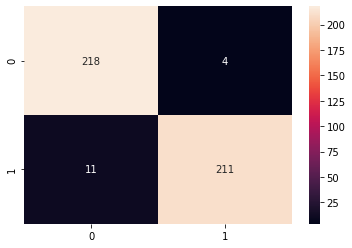

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       222
           1       0.98      0.95      0.97       222

    accuracy                           0.97       444
   macro avg       0.97      0.97      0.97       444
weighted avg       0.97      0.97      0.97       444



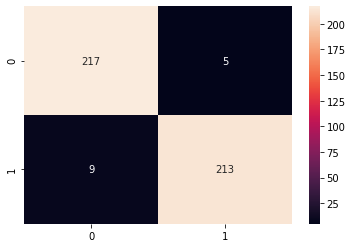

In [ ]:
y_pred_val = model_rfc.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
# Predict for the competition 
# We make a prediction for the last model (second approach): 
# this is also our last approach for the competition purposes.

preds = model_rfc.predict(x_val)
preds = pd.DataFrame(preds, columns=['Attrition'], dtype=np.int64)
emp_nr = emp_nr.reset_index(drop=True)
preds = emp_nr.join(preds)
preds.to_csv('preds_rfc4.csv', index=False)

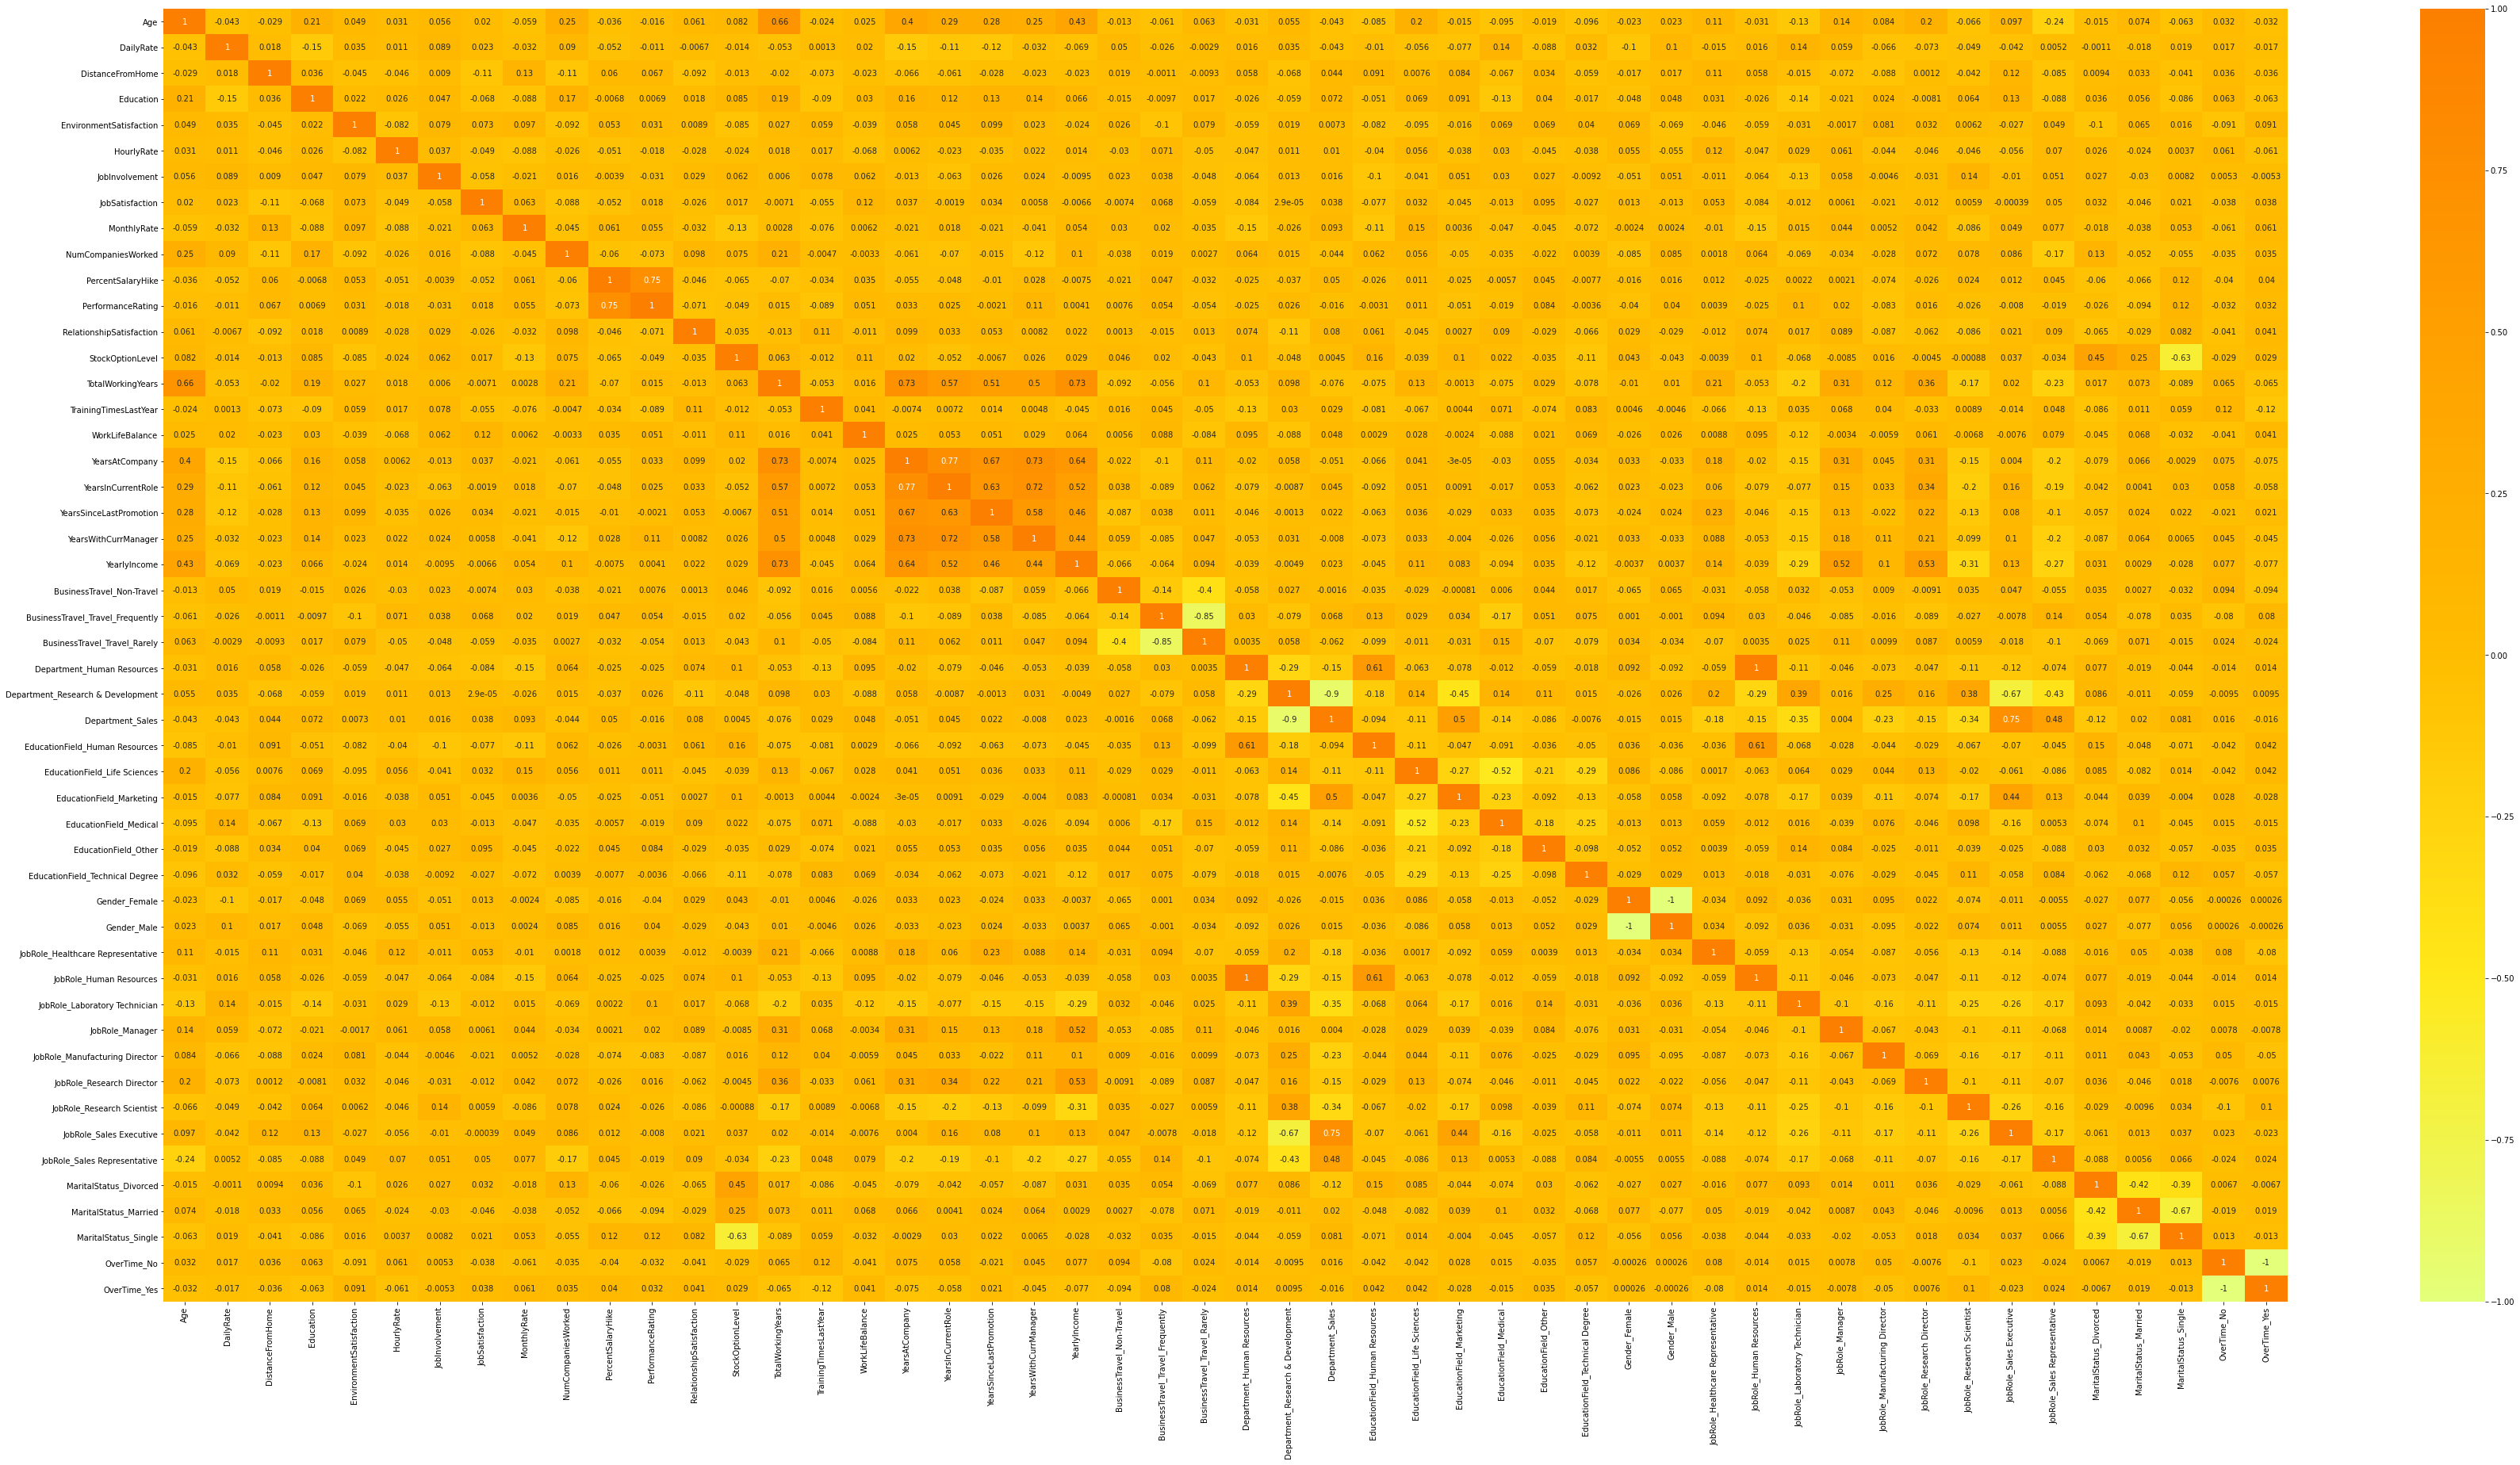

In [ ]:
f = plt.figure(figsize=(60,30))
corr = X_test.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
# We decide to drop columns, where between them is an significant correlation
# (higher than 0.9). This are columns JobLevel i MonthlyIncome.
# We drop them from all df's.
X_test = X_test.drop(labels={'JobLevel', 'MonthlyIncome', 'YearsAtCompany'},
                     axis=1)
X_train = X_train.drop(labels={'JobLevel', 'MonthlyIncome', 'YearsAtCompany'},
                       axis=1)
X_val = X_val.drop(labels={'JobLevel', 'MonthlyIncome', 'YearsAtCompany'},
                   axis=1)
x_val = x_val.drop(labels={'JobLevel', 'MonthlyIncome', 'YearsAtCompany'},
                   axis=1)

In [ ]:
# Now, with new df's we we run again our random forest model from the 
# Second approach
model_rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight={0: 0.4, 1: 0.6}, criterion='gini',
                        max_depth=45, max_features=3, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=900, n_jobs=None, oob_score=False,
                        random_state=42, verbose=0, warm_start=False)
model_rfc.fit(X_train, y_train)

In [ ]:
# Predict for the competition - final one!!!
# We make a prediction for the last model (second approach): 
# this is also our last approach for the competition purposes.

preds = model_rfc.predict(x_val)
preds = pd.DataFrame(preds, columns=['Attrition'], dtype=np.int64)
emp_nr = emp_nr.reset_index(drop=True)
preds = emp_nr.join(preds)
preds.to_csv('preds_rfc4.csv', index=False)